<a href="https://colab.research.google.com/github/SakshyamAryal077/Loan-Data-Processsing/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving myloandata.csv to myloandata.csv


In [ ]:
import pandas as pd
import numpy as np

# Load dataset (replace filename if needed)
df = pd.read_csv("myloandata.csv")

print("Initial shape:", df.shape)
print(df.head())




Initial shape: (614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural          

In [ ]:
#Removing the Empty Row and Column


# Drop columns that are completely empty
df = df.dropna(axis=1, how='all')

# Drop rows that are completely empty
df = df.dropna(axis=0, how='all')

print("Shape after dropping empty rows/columns:", df.shape)



Shape after dropping empty rows/columns: (614, 13)


In [ ]:
#  Handle Missing Values


# Fill categorical missing values with mode (most common value)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical missing values with median (better for skewed data)
for col in ['LoanAmount', 'Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-217122220.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-217122220.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Binning

# Create bins for ApplicantIncome
df['Income_Bin'] = pd.cut(df['ApplicantIncome'],
                          bins=[0,2500,4000,6000,81000],
                          labels=['Low','Average','High','Very High'])

# Similarly for LoanAmount
df['LoanAmount_Bin'] = pd.cut(df['LoanAmount'],
                              bins=[0,100,200,700],
                              labels=['Low','Average','High'])


In [ ]:
# Encode Categorical Variables


from sklearn.preprocessing import LabelEncoder

cols = ['Gender','Married','Education','Self_Employed','Property_Area',
        'Income_Bin','LoanAmount_Bin','Loan_Status']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


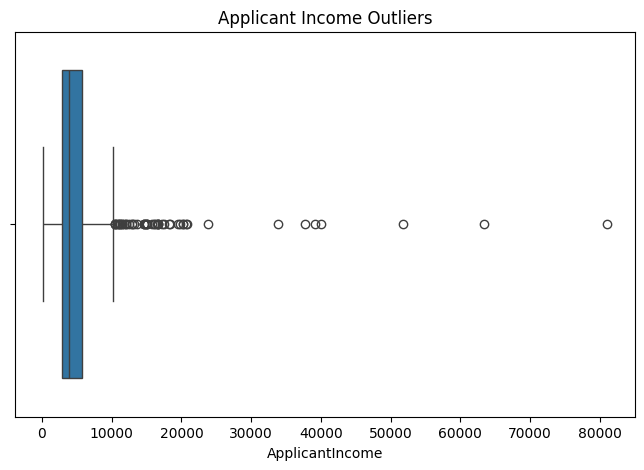

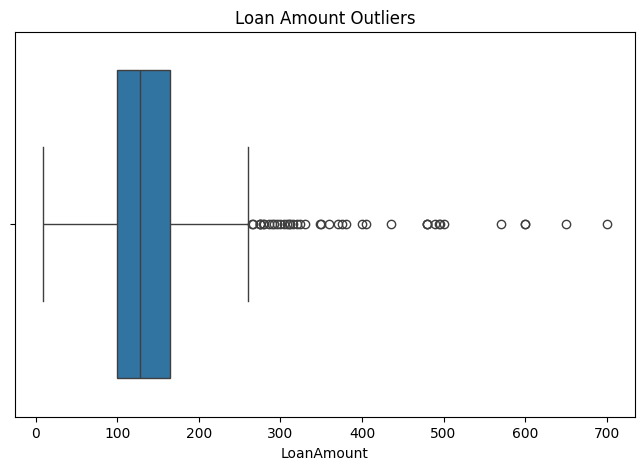

In [ ]:
# Outlier Detection (Boxplots)
# ------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=df["ApplicantIncome"])
plt.title("Applicant Income Outliers")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df["LoanAmount"])
plt.title("Loan Amount Outliers")
plt.show()

In [ ]:


# Outlier Handling (Log Transformation)
# ------------------------------
df["ApplicantIncomeLog"] = np.log1p(df["ApplicantIncome"])
df["LoanAmountLog"] = np.log1p(df["LoanAmount"])

In [ ]:
# Putting the Mean Imputation on the negative of the log values

df["ApplicantIncomeLog"].fillna(df["ApplicantIncomeLog"].mean(), inplace=True)
df["LoanAmountLog"].fillna(df["LoanAmountLog"].mean(), inplace=True)


/tmp/ipython-input-1433512202.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ApplicantIncomeLog"].fillna(df["ApplicantIncomeLog"].mean(), inplace=True)
/tmp/ipython-input-1433512202.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
#Splitting into Training and Testing
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("Loan_Status", axis=1)  # input features
y = df["Loan_Status"]              # target column

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (491, 16)
Testing set size: (123, 16)


In [ ]:
df.to_csv("loan_cleaned.csv", index=False)
print(" Preprocessed data saved as loan_cleaned.csv")


 Preprocessed data saved as loan_cleaned.csv


In [ ]:
from google.colab import files
files.download("loan_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>